In [7]:
import pandas as pd

# Create sample sales data
data = {
    'Order_ID': [1001,1002,1003,1004,1005,1006,1007,1008,1009,1010],
    'Date': ['2025-01-03','2025-01-04','2025-01-06','2025-01-09','2025-01-12','2025-01-14','2025-02-03','2025-02-08','2025-02-10','2025-02-15'],
    'Customer_ID': ['C001','C002','C003','C002','C004','C005','C001','C006','C007','C002'],
    'Region': ['North','South','East','South','West','North','North','East','South','South'],
    'Product': ['Laptop','Phone','Tablet','Laptop','Phone','Laptop','Tablet','Laptop','Phone','Laptop'],
    'Quantity': [2,3,1,1,4,3,2,1,2,1],
    'Sales': [1800,900,400,900,1200,2700,800,900,600,900],
    'Profit': [300,150,80,200,300,450,160,180,120,150],
    'Leads': [10,8,5,8,7,9,6,5,7,8]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Order_ID,Date,Customer_ID,Region,Product,Quantity,Sales,Profit,Leads
0,1001,2025-01-03,C001,North,Laptop,2,1800,300,10
1,1002,2025-01-04,C002,South,Phone,3,900,150,8
2,1003,2025-01-06,C003,East,Tablet,1,400,80,5
3,1004,2025-01-09,C002,South,Laptop,1,900,200,8
4,1005,2025-01-12,C004,West,Phone,4,1200,300,7


In [9]:
# 1. Total Sales
total_sales = df['Sales'].sum()

# 2. Total Orders
total_orders = df['Order_ID'].nunique()

# 3. Average Order Value (AOV)
aov = df['Sales'].mean()

# 4. Number of Customers
unique_customers = df['Customer_ID'].nunique()

# 5. Repeat Purchase Rate
repeat_customers = df['Customer_ID'].value_counts().loc[lambda x: x > 1].count()
repeat_purchase_rate = (repeat_customers / unique_customers) * 100

# 6. Monthly Sales Growth
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
sales_growth = ((monthly_sales.iloc[-1] - monthly_sales.iloc[0]) / monthly_sales.iloc[0]) * 100

# 7. Conversion Rate
conversion_rate = (len(df) / df['Leads'].sum()) * 100

# 8. Top Product
top_product = df.groupby('Product')['Sales'].sum().idxmax()

# 9. Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum()

# 10. Profit Margin
profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100


In [10]:
print("====== SALES KPI DASHBOARD ======")
print(f"Total Sales: ${total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): ${aov:.2f}")
print(f"Number of Customers: {unique_customers}")
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")
print(f"Sales Growth: {sales_growth:.2f}%")
print(f"Conversion Rate: {conversion_rate:.2f}%")
print(f"Top Product: {top_product}")
print(f"Profit Margin: {profit_margin:.2f}%")
print("\nRegion-wise Sales:")
print(region_sales)


====== SALES KPI DASHBOARD ======
Total Sales: $11100
Total Orders: 10
Average Order Value (AOV): $1110.00
Number of Customers: 7
Repeat Purchase Rate: 28.57%
Sales Growth: -59.49%
Conversion Rate: 13.70%
Top Product: Laptop
Profit Margin: 18.83%

Region-wise Sales:
Region
East     1300
North    5300
South    3300
West     1200
Name: Sales, dtype: int64


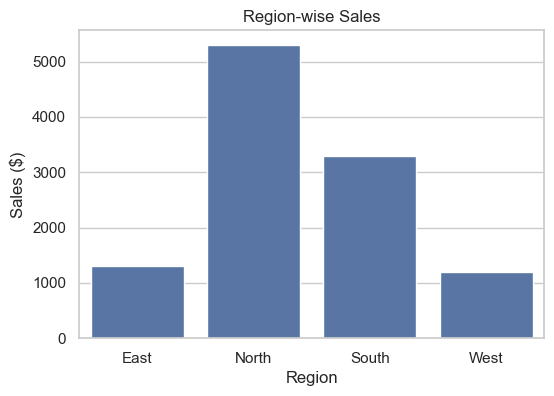

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid")

# 1. Region-wise Sales
plt.figure(figsize=(6,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Region-wise Sales")
plt.ylabel("Sales ($)")
plt.show()


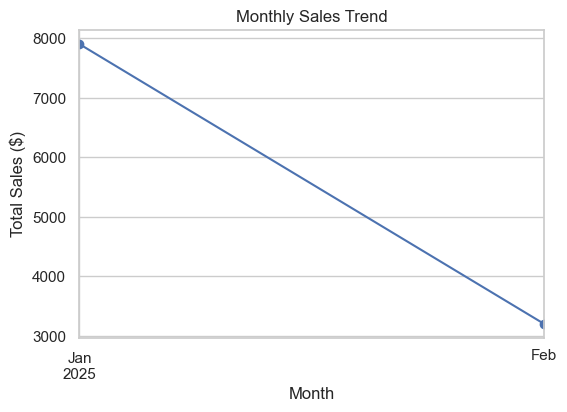

In [12]:
plt.figure(figsize=(6,4))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_12136\208289319.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Product'], y=df['Sales'], estimator=sum, ci=None)


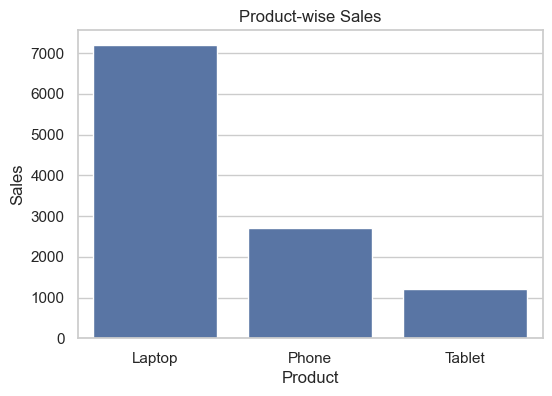

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Product'], y=df['Sales'], estimator=sum, ci=None)
plt.title("Product-wise Sales")
plt.show()

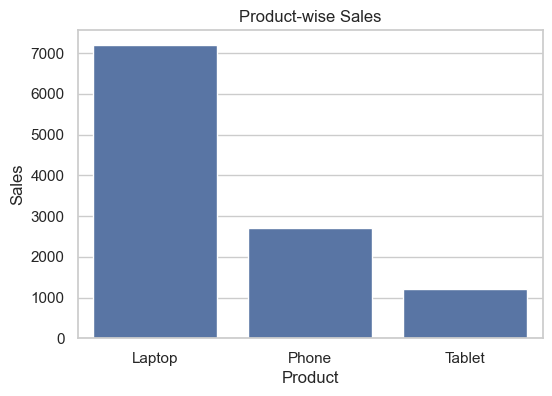

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Product'], y=df['Sales'], estimator=sum, errorbar=None)
plt.title("Product-wise Sales")
plt.show()